In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

#### Importing the Data used in the analysis

In [2]:
data_path='epa-sea-level.csv'
sea_level_df=pd.read_csv(data_path)
print(sea_level_df.info())
sea_level_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB
None


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


#### Scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis

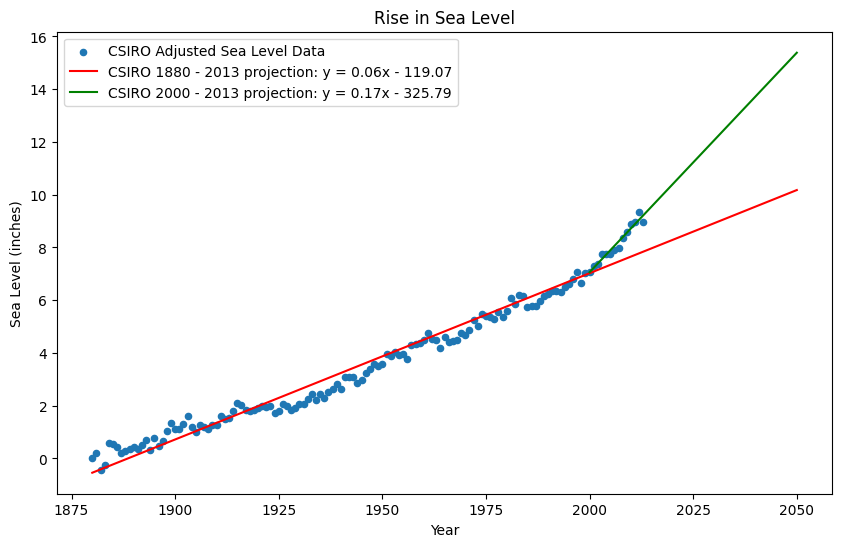

In [4]:
scatter_plot=sea_level_df.plot(kind='scatter',x="Year",y='CSIRO Adjusted Sea Level',
                               label='CSIRO Adjusted Sea Level Data',figsize=(10,6))
scatter_plot.set_title('Rise in Sea Level')
scatter_plot.set_ylabel('Sea Level (inches)')

# Linear fit using all the data
lin_fit_1880=linregress(sea_level_df['Year'],sea_level_df['CSIRO Adjusted Sea Level'])
years_1880_to_2050=np.arange(sea_level_df['Year'].min(),2051)
projected_CSIRO_1880=lin_fit_1880.intercept + lin_fit_1880.slope * years_1880_to_2050

# Linear fit based only on the observations recorded after year 2000
sea_level_df_2000=sea_level_df.loc[sea_level_df['Year']>=2000]
lin_fit_2000=linregress(sea_level_df_2000['Year'],sea_level_df_2000['CSIRO Adjusted Sea Level'])
years_2000_to_2050=np.arange(sea_level_df_2000['Year'].min(),2051)
projected_CSIRO_2000=lin_fit_2000.intercept + lin_fit_2000.slope * years_2000_to_2050

scatter_plot.plot(years_1880_to_2050,projected_CSIRO_1880,'r',
                  label=f'CSIRO 1880 - 2013 projection: y = {lin_fit_1880.slope:.2f}x - {-lin_fit_1880.intercept:.2f}')
scatter_plot.plot(years_2000_to_2050,projected_CSIRO_2000,'g',
                  label=f'CSIRO 2000 - 2013 projection: y = {lin_fit_2000.slope:.2f}x - {-lin_fit_2000.intercept:.2f}')
plt.legend(fontsize = 'medium')